# Task 4.10 Part 1

### This script contain the following parts:
#### 01. Import merged version of data set customer_merged
#### 02. Addresses PII data
#### 03. Compares customer behavior in different geographic areas.
#### 04. Excludes low-activity customers from the data
#### 05. Profiles customers based on age, income, certain goods in 'department_id', and number of dependants, orders day of the week, and order hour of day.
#### 06. Visualization to show the distribution of profiles
#### 07. Aggregates the max, mean, and min variables on a customer-profile level for usage frequence and expenditure.
#### 08. Compares customer profiles with regions and departments to identify a link between them.
#### 09. Charts to illustrate results

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans

### 01. Import merged version of data set customer_merged

In [2]:
# Create Path
path = r'/Users/schitchards/Documents/Data Analytics/Programming/Instacart Basket Analysis'

In [3]:
# Import dataframe
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_merged.pkl'))

In [4]:
# Check output of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 object 
 1   user_id                  object 
 2   order_number             int64  
 3   orders_day_of_week       int64  
 4   order_hour_of_day        int64  
 5   days_since_prior_order   float64
 6   active                   bool   
 7   product_id               object 
 8   add_to_cart_order        int64  
 9   reordered                int64  
 10  product_name             object 
 11  aisle_id                 object 
 12  department_id            object 
 13  prices                   float64
 14  price_range_loc          object 
 15  busiest_day              object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int64  
 19  loyalty_flag             object 
 20  mean_prices              float64
 21  spendi

In [5]:
# Set up display area to show all columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [6]:
df.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,active,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_order,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least Busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least Busy,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least Busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#Create sample of data to speed up processing time
np.random.seed(4)
dev=np.random.rand(len(df)) <=0.7
big=df[dev]
small=df[~dev]

In [8]:
#Check split output
len(big)+len(small)

32404859

In [9]:
#Create sample dataframe
df_2=small

### 02. Address any PII data

In [10]:
# Address PII data (first name, last name)
df_secure = df_2.drop(columns = ['first_name','last_name'])

In [11]:
# Check ouput for dropped columns
df_secure.shape

(9721098, 31)

### 03. Compares customer behavior in different geographic areas.

In [12]:
# Create loop for region column
result = []
for value in df_secure['state']:
    if (value in['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        result.append('Northeast')
    elif (value in['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        result.append ('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
        result.append ('South')
    else:
        result.append ('West')

In [13]:
# Apply region list to dataframe
df_secure['region']=result

In [14]:
# Check frequency count of region column
df_secure['region'].value_counts(dropna=False)

West         3257203
South        2466843
Midwest      2280386
Northeast    1716666
Name: region, dtype: int64

In [15]:
# Crosstab Regions with spending_flag
crosstab_region_spending =pd.crosstab(df_secure['region'], df_secure['spending_flag'],dropna=False)

In [16]:
# Copy table to clipboard
crosstab_region_spending.to_clipboard()

In [17]:
# Create total customer column
crosstab_region_spending['total_customers'] = crosstab_region_spending['High spender'] + crosstab_region_spending['Low spender'] 

In [18]:
# Create percentage of high spenders column
crosstab_region_spending['%_of_high_spenders'] = ((crosstab_region_spending['High spender'] / crosstab_region_spending['total_customers'])*100).round(2).astype(str) + '%'

In [19]:
# Check output
crosstab_region_spending

spending_flag,High spender,Low spender,total_customers,%_of_high_spenders
region,,,,
Midwest,46814,2233572,2280386,2.05%
Northeast,32419,1684247,1716666,1.89%
South,49297,2417546,2466843,2.0%
West,61817,3195386,3257203,1.9%


Based on the crosstab output for percentage of high spenders in each region we can see that there isn't a large difference in spending habits between the different U.S. regions.

In [20]:
# Crosstab Regions with spending_flag no total customer
crosstab_region_spending2 =pd.crosstab(df_secure['region'], df_secure['spending_flag'],dropna=False)
crosstab_region_spending2

spending_flag,High spender,Low spender
region,,
Midwest,46814,2233572
Northeast,32419,1684247
South,49297,2417546
West,61817,3195386


<Figure size 432x288 with 0 Axes>

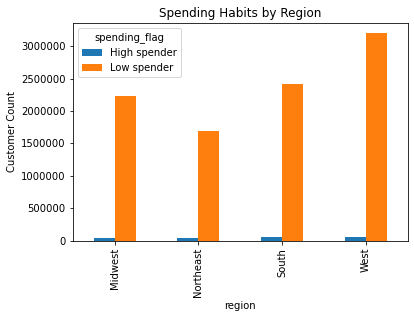

In [21]:
# Ordering habits based on region and spend
plt.figure()
bar_region_spend=crosstab_region_spending2.plot.bar(title='Spending Habits by Region')
plt.ylabel('Customer Count')
plt.ticklabel_format(style='plain', axis='y')
bar_region_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_spend.png'),dpi=300)

### 04. Excludes low-activity customers from the data

In [22]:
# Create exclusion flag for low-activity customers
df_secure.loc[df_secure['max_order'] < 5, 'exclusion_flag'] = 'regular-activity customer'

In [23]:
# Create exclusion flag for low-activity customers
df_secure.loc[df_secure['max_order'] >= 5, 'exclusion_flag'] = 'high-activity customer'

In [24]:
#Check frequency output
df_secure['exclusion_flag'].value_counts(dropna=False)

high-activity customer       9289401
regular-activity customer     431697
Name: exclusion_flag, dtype: int64

In [25]:
# Create new dataframe with only high-activity customers
df_secure_high = df_secure[df_secure['exclusion_flag']== 'high-activity customer']

In [26]:
#Check output
df_secure_high.shape

(9289401, 33)

In [27]:
# Export high activity customer dataframe
df_secure_high.to_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl'))

### 05. Profiles customers based on age, income, certain goods in 'department_id', and number of dependants, orders day of the week, and order hour of day.

In [28]:
# Change numeric display
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
# Check descriprive stats
df_secure_high.describe()

,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices,max_order,mean_prices,median_days_since_order,age,number_of_dependants,income
count,9289401.00000,9289401.00000,9289401.00000,8791611.00000,9289401.00000,9289401.00000,9287880.00000,9289401.00000,9289401.00000,9289401.00000,9289401.00000,9289401.00000,9289401.00000
mean,17.84310,2.74276,13.41103,10.80890,8.36368,0.60598,7.79091,34.42948,7.79041,9.95699,49.46929,1.50166,99694.73442
std,17.63775,2.08964,4.24845,8.58088,7.13442,0.48864,4.24088,24.89209,0.72144,6.66709,18.48878,1.11879,43173.36164
min,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,5.00000,1.00000,0.00000,18.00000,0.00000,25903.00000
25%,5.00000,1.00000,10.00000,5.00000,3.00000,0.00000,4.20000,14.00000,7.38529,6.00000,33.00000,1.00000,67300.00000
50%,12.00000,3.00000,13.00000,7.00000,6.00000,1.00000,7.40000,28.00000,7.81224,7.00000,49.00000,2.00000,96779.00000
75%,25.00000,5.00000,16.00000,14.00000,11.00000,1.00000,11.30000,48.00000,8.22395,12.50000,65.00000,3.00000,128138.00000
max,99.00000,6.00000,23.00000,30.00000,145.00000,1.00000,25.00000,99.00000,20.11429,30.00000,81.00000,3.00000,593901.00000


#### Profiling by age group

In [30]:
# Profiling age groups
result_age =[]
for value in df_secure_high['age']:
    if (value >= 10) and (value <= 25):
        result_age.append ('Gen Z')
    elif (value >= 26) and (value <= 41):
        result_age.append ('Millennials')
    elif (value >= 42) and (value <= 57):
        result_age.append ('Gen X')
    elif (value >= 58) and (value <=67):
        result_age.append ('Boomers II')
    elif (value >= 68) and (value <=76):
        result_age.append ('Boomers I')
    elif value >=77:
        result_age.append ('Post War')
    else:
        result_age.append ('Not enough data')

In [31]:
# Apply age_groups function
df_secure_high['age_groups']=result_age

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/825857644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high['age_groups']=result_age


In [32]:
#Change max row display
pd.set_option('display.max_columns',50)

In [33]:
# Frequency count for age groups
df_secure_high['age_groups'].value_counts(dropna=False)

Gen X          2348693
Millennials    2319937
Boomers II     1418479
Boomers I      1310397
Gen Z          1160042
Post War        731853
Name: age_groups, dtype: int64

#### Profiling by income

In [34]:
# Profiling Income
result_income = []
for value in df_secure_high['income']:
    if value <= 32048:
        result_income.append ('Lower class')
    elif (value >32048) and (value <= 53413):
        result_income.append ('Lower-middle class')
    elif (value >53413) and (value <= 106827):
        result_income.append ('Middle class')
    elif (value >106827) and (value <= 373894):
        result_income.append ('Upper-middle class')
    elif (value > 373894):
        result_income.append ('Upper class')
    else:
        result_income.append ('Not enough data')

In [35]:
#Add income_group list to dataframe
df_secure_high['income_group']=result_income

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/4011941049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high['income_group']=result_income


In [36]:
#Check income_group frequency
df_secure_high['income_group'].value_counts(dropna=False)

Middle class          4379371
Upper-middle class    3686323
Lower-middle class    1058862
Lower class            147293
Upper class             17552
Name: income_group, dtype: int64

In [37]:
df_secure_high.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,active,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,exclusion_flag,age_groups,income_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.00000,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class
2,473747,1,3,3,12,21.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class


#### Grouping customers to solve total spend

In [38]:
#Solve customer total spend
df_secure_high.groupby('user_id').agg({'prices':['sum']})

,prices
,sum
user_id,
1,143.80000
10,471.90000
100,30.40000
1000,225.70000
10000,2734.40000
...,...
99994,423.00000
99995,135.10000


In [39]:
df_secure_high['total_spend']=df_secure_high.groupby(['user_id'])['prices'].transform(np.sum)

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/1822065497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high['total_spend']=df_secure_high.groupby(['user_id'])['prices'].transform(np.sum)


In [40]:
#Show output
df_secure_high.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,active,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,exclusion_flag,age_groups,income_group,total_spend
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.00000,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class,143.80000
2,473747,1,3,3,12,21.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class,143.80000
3,2254736,1,4,4,7,29.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Least Busy,Least busiest days,Average orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class,143.80000
6,550135,1,7,1,9,20.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.36780,Low spender,20.50000,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennials,Lower-middle class,143.80000
10,2968173,15,15,1,9,7.00000,False,196,2,0,Soda,77,7,9.00000,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.98056,Low spender,10.00000,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,high-activity customer,Boomers I,Middle class,104.50000
12,1911383,15,18,2,11,7.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Regularly busy,Regularly busy days,Most orders,22,Regular customer,3.98056,Low spender,10.00000,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,high-activity customer,Boomers I,Middle class,104.50000
13,2715276,15,21,1,9,7.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.98056,Low spender,10.00000,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,high-activity customer,Boomers I,Middle class,104.50000
19,1593000,31,10,3,8,7.00000,False,196,17,0,Soda,77,7,9.00000,Mid-range product,Regularly busy,Least busiest days,Average orders,20,Regular customer,8.13779,Low spender,6.00000,Frequent customer,Female,Oklahoma,38,1/22/2019,1,married,52311,West,high-activity customer,Millennials,Lower-middle class,559.80000
21,2580647,43,6,4,16,4.00000,False,196,9,0,Soda,77,7,9.00000,Mid-range product,Least Busy,Least busiest days,Most orders,11,Regular customer,7.44490,Low spender,10.00000,Frequent customer,Female,Tennessee,41,11/19/2018,1,married,123723,South,high-activity customer,Millennials,Upper-middle class,323.50000
22,2187180,43,9,4,12,3.00000,False,196,1,1,Soda,77,7,9.00000,Mid-range product,Least Busy,Least busiest days,Most orders,11,Regular customer,7.44490,Low spender,10.00000,Frequent customer,Female,Tennessee,41,11/19/2018,1,married,123723,South,high-activity customer,Millennials,Upper-middle class,323.50000


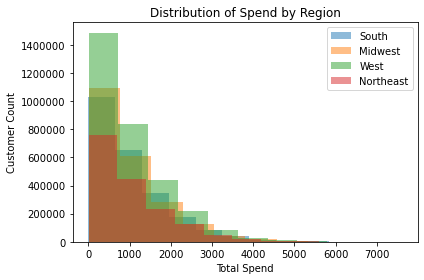

In [41]:
# Histogram of spend by region
plt.hist('total_spend', data=df_secure_high[df_secure_high['region'] == 'South'], alpha=0.5, label='South')
plt.hist('total_spend', data=df_secure_high[df_secure_high['region'] == 'Midwest'], alpha=0.5, label='Midwest')
plt.hist('total_spend', data=df_secure_high[df_secure_high['region'] == 'West'], alpha=0.5, label='West')
plt.hist('total_spend', data=df_secure_high[df_secure_high['region'] == 'Northeast'], alpha=0.5, label='Northeast')
plt.title('Distribution of Spend by Region')
plt.xlabel('Total Spend')
plt.ylabel('Customer Count')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','overlapping_histo_spend_region.png',))

#### Grouping customers based on family status, income group and number of dependants

In [42]:
# Profile based on family structure
result_nest=[]
for value in df_secure_high['number_of_dependants']:
    if (value == 0):
        result_nest.append ('Empty nest')
    elif (value > 0):
        result_nest.append ('Full nest')
    else:
        result_nest.append ('Not enough data')

In [43]:
# Add household structure list to datafram
df_secure_high['family_structure']=result_nest

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/3860019099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high['family_structure']=result_nest


In [44]:
# Show frequency count for family status
df_secure_high['family_structure'].value_counts(dropna=False)

Full nest     6967689
Empty nest    2321712
Name: family_structure, dtype: int64

In [45]:
#Group data based on family status
df_secure_high.sort_values(['number_of_dependants'],ascending=False).groupby(['family_status','age_groups','income_group']).agg({'number_of_dependants':['mean']})

number_of_dependants
                                                                                mean
family_status                    age_groups  income_group                           
divorced/widowed                 Boomers I   Lower class                     0.00000
                                             Lower-middle class              0.00000
                                             Middle class                    0.00000
                                             Upper class                     0.00000
                                             Upper-middle class              0.00000
                                 Boomers II  Lower class                     0.00000
                                             Lower-middle class              0.00000
                                             Middle class                    0.00000
                                             Upper class                     0.00000
                                             Upper-middle class              0.00000
                                 Post War    Lower class                     0.00000
                                             Lower-middle class              0.00000
                                             Middle class                    0.00000
                                             Upper class                     0.00000
                                             Upper-middle class              0.00000
living with parents and siblings Gen Z       Lower class                     1.92370
                                             Lower-middle class              1.96372
                                             Middle class                    1.99311
                                             Upper class                     3.00000
                                             Upper-middle class              1.95639
married                          Boomers I   Lower class                     2.00102
                                             Lower-middle class              1.97238
                                             Middle class                    2.01055
                                             Upper class                     2.10887
                                             Upper-middle class              2.00590
                                 Boomers II  Lower class                     2.03362
                                             Lower-middle class              2.05196
                                             Middle class                    2.00104
                                             Upper class                     2.28945
                                             Upper-middle class              2.01884
                                 Gen X       Lower class                     2.03039
                                             Lower-middle class              2.00162
                                             Middle class                    1.98968
                                             Upper class                     2.10466
                                             Upper-middle class              1.99642
                                 Gen Z       Lower class                     2.04038
                                             Lower-middle class              2.01493
                                             Middle class                    2.00427
                                             Upper class                     2.32000
                                             Upper-middle class              2.00188
                                 Millennials Lower class                     2.00907
                                             Lower-middle class              2.02425
                                             Middle class                    1.99767
                                             Upper class                     2.06587
                                             Upper-middle class      

#### Profiling customer based on day of week shopping habits

In [46]:
# Profile shopping habits
result_habit=[]
for value in df_secure_high['orders_day_of_week']:
    if value in {2,3,4}:
        result_habit.append('early weekday shopper')
    elif value in {5,6}:
        result_habit.append('end of week shopper')
    elif value in {0,1}:
        result_habit.append('weekend shopper')
    else:
        result_habit.append('not enough data')

In [47]:
#Add shopping_habit list to dataframe
df_secure_high['shopping_habit']=result_habit

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/4092902489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high['shopping_habit']=result_habit


#### Customer profile based on family structure and age

In [48]:
#Sort profiles using loc
df_secure_high.loc[(df_secure_high['age']<=25) & (df_secure_high['family_structure'] == 'Empty nest'),'profile_loc']= 'Young adult with no dependants'
df_secure_high.loc[(df_secure_high['age']<=35 ) & (df_secure_high['family_structure'] =='Full nest'),'profile_loc']= 'Young family'
df_secure_high.loc[(df_secure_high['age']>35) & (df_secure_high['family_structure'] =='Full nest'),'profile_loc']= 'Older family'
df_secure_high.loc[(df_secure_high['age']>25)& (df_secure_high['age']<65) & (df_secure_high['family_structure'] == 'Empty nest'),'profile_loc']= 'Older adult with no dependants'
df_secure_high.loc[(df_secure_high['age']>=65) & (df_secure_high['family_structure'] == 'Empty nest'),'profile_loc']= 'Senior'

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/746353522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secure_high.loc[(df_secure_high['age']<=25) & (df_secure_high['family_structure'] == 'Empty nest'),'profile_loc']= 'Young adult with no dependants'


In [49]:
#Frequency of each customer profile
df_secure_high['profile_loc'].value_counts(dropna=False).sort_index()

Older adult with no dependants    1429504
Older family                      4998486
Senior                             606701
Young adult with no dependants     285507
Young family                      1969203
Name: profile_loc, dtype: int64

### 06. Visualization to show the distribution of profiles

In [50]:
# Change numeric display
pd.set_option('display.float_format', lambda x: '%.9f' % x)

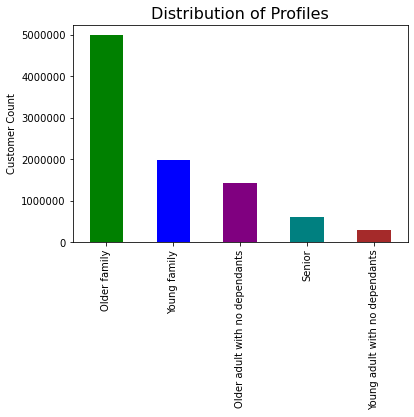

In [51]:
# Distribution of profile_loc
New_colours = ['green','blue','purple','teal','brown']
bar_profile=df_secure_high['profile_loc'].value_counts().plot.bar(color=New_colours)
plt.title('Distribution of Profiles', size=16)
plt.ylabel('Customer Count')
plt.ticklabel_format(style='plain', axis='y')
plt.autolayout :True
bar_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_profiles.png'),dpi=300)

In [52]:
#Export bar graph
bar_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_profiles.png'))

### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequence and expenditure.

In [53]:
# Aggregate based on order frequency
df_secure_high.groupby('profile_loc').agg({'order_number':['mean','min','max']})

order_number        
                                       mean min max
profile_loc                                        
Older adult with no dependants 18.080745489   1  99
Older family                   17.792140660   1  99
Senior                         17.861716068   1  99
Young adult with no dependants 17.581488370   1  99
Young family                   17.832123961   1  99

In [54]:
# Aggregate based on expenditure
df_secure_high.groupby('profile_loc').agg({'total_spend':['mean','min','max']})

total_spend                           
                                         mean         min            max
profile_loc                                                             
Older adult with no dependants 1047.461343795 1.100000000 7248.500000000
Older family                   1025.779800944 1.000000000 7612.300000000
Senior                         1019.398197794 1.100000000 5468.000000000
Young adult with no dependants 1005.715268978 1.400000000 5303.900000000
Young family                   1039.942807420 1.100000000 5858.500000000

### 08. Compares customer profiles with regions and departments to identify a link between them.


In [56]:
# Compare customer profile to region
depart_crosstab = pd.crosstab(df_secure_high['department_id'],df_secure_high['profile_loc'],dropna=False)
depart_crosstab

profile_loc,Older adult with no dependants,Older family,Senior,Young adult with no dependants,Young family
department_id,,,,,
1,97149,342245,42628,19159,135221
10,1495,5534,645,287,2180
11,19551,68697,8521,3922,26555
12,30097,109870,13371,6180,42964
13,82421,287856,34777,16246,113456
14,31315,107960,12760,6149,43028
15,46367,164412,19336,9455,64954
16,239079,832689,101310,47601,332239
17,31469,114828,13458,6386,43991


Older adults with no dependants spend the most on department 4 and the least on department 10
Older families spend the most on department 4 and the least on department 10
Seniors spend the most on department 4 and the least on department 2
Young adult with no dependants spend the most on department 4 and the least on department 10
Young families spend the most on department 4 and the least on department 10

Department 4 (produce) is the highest across all profiles and department 10 (bulk) is the lowest except for with seniors who spend the least on department 4 (other)

In [57]:
# Compare customer profile to region
region_crosstab = pd.crosstab(df_secure_high['region'],df_secure_high['profile_loc'],dropna=False)
region_crosstab                           

profile_loc,Older adult with no dependants,Older family,Senior,Young adult with no dependants,Young family
region,,,,,
Midwest,341839,1174670,140789,63750,458730
Northeast,241019,886565,113970,51389,346208
South,361221,1267882,150042,75722,502917
West,485425,1669369,201900,94646,661348


Older families make up the highest profile group in all regions.

### 09. Charts to illustrate results

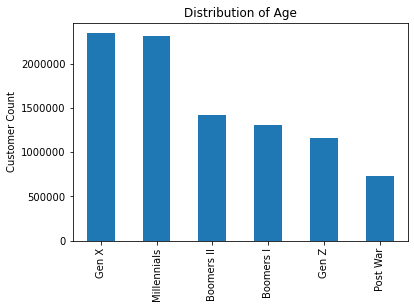

In [58]:
# Distribution of ages 
bar_agegroups=df_secure_high['age_groups'].value_counts().plot.bar()
plt.title('Distribution of Age')
plt.ylabel('Customer Count')
plt.ticklabel_format(style='plain', axis='y')
plt.autolayout :True
#Export bar graph
bar_agegroups.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_agegroups.png'))

In [59]:
# Distribution of Age and family status
crosstab_age_familystatus= pd.crosstab(index=df_secure_high['age_groups'],columns=df_secure_high['family_status'])
crosstab_age_familystatus

family_status,divorced/widowed,living with parents and siblings,married,single
age_groups,,,,
Boomers I,318716,0,991681,0
Boomers II,291274,0,1048711,78494
Gen X,0,0,1768542,580151
Gen Z,0,445109,429426,285507
Millennials,0,0,1736035,583902
Post War,183668,0,548185,0


In [60]:
# Create stacked 100% bar graph for age groups and family status
bar_familystatus = pd.crosstab(df_secure_high['age_groups'], df_secure_high['family_status']).apply(lambda r: r/r.sum()*100, axis=1)
bar_familystatus

family_status,divorced/widowed,living with parents and siblings,married,single
age_groups,,,,
Boomers I,24.322094754,0.000000000,75.677905246,0.000000000
Boomers II,20.534248304,0.000000000,73.932077951,5.533673745
Gen X,0.000000000,0.000000000,75.298985436,24.701014564
Gen Z,0.000000000,38.370076256,37.018142447,24.611781298
Millennials,0.000000000,0.000000000,74.831126880,25.168873120
Post War,25.096296661,0.000000000,74.903703339,0.000000000


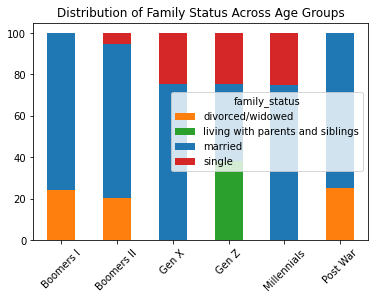

In [61]:

bar_family_status = bar_familystatus.plot(kind ='bar', stacked=True, color = ['tab:orange','tab:green','tab:blue','tab:red'])
plt.xlabel('')
plt.title('Distribution of Family Status Across Age Groups')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation =45)
plt.autolayout :True
bar_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_family_status.png'))

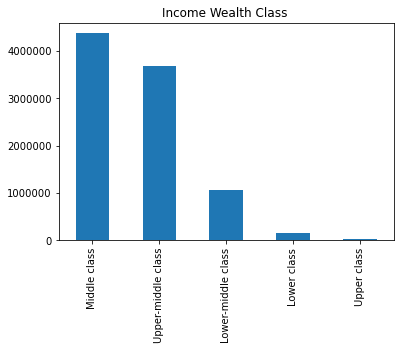

In [62]:
# Distribution of income
bar_income=df_secure_high['income_group'].value_counts().plot.bar()
plt.title('Income Wealth Class ')
plt.ticklabel_format(style='plain', axis='y')
plt.autolayout :True
#Export bar graph
bar_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income.png'))

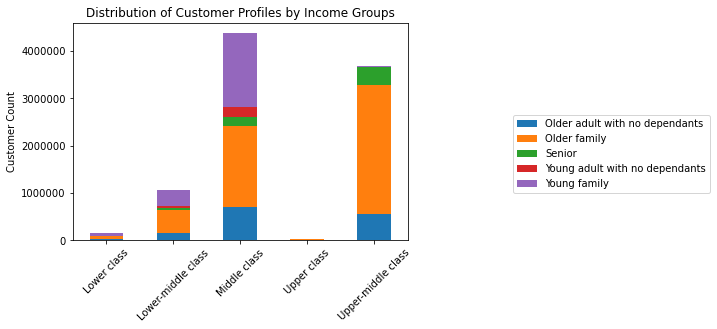

In [63]:
# Distribution of Income by customer profiles
bar_income_profile = df_secure_high.groupby(['income_group','profile_loc']).size().unstack()\
    .plot(kind='bar',stacked=True)
plt.title('Distribution of Customer Profiles by Income Groups')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor =(1.3, 0.6))
plt.xlabel('')
plt.ylabel('Customer Count')
plt.xticks(rotation =45)
plt.autolayout :True
bar_income_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_profile.png'))

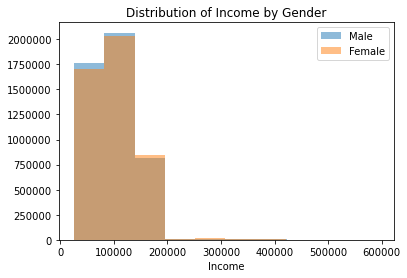

In [64]:
# Histogram of income by gender
plt.hist('income', data=df_secure_high[df_secure_high['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('income', data=df_secure_high[df_secure_high['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.autoscale()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','overlapping_histo_income_gender.png'))

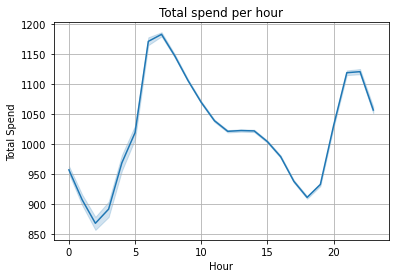

In [65]:
# Line Chart of total_spend to hour of day
line_spend = sns.lineplot(data = df_secure_high, x='order_hour_of_day',y='total_spend')
plt.title('Total spend per hour')
plt.xlabel('Hour')
plt.ylabel('Total Spend')
plt.grid()
plt.autoscale()
line_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_spend_hour.png'))

In [66]:
#Pie chart of price ranges value counts
df_secure_high['price_range_loc'].value_counts(dropna=False)

Mid-range product     6268034
Low-range product     2901877
High-range product     119490
Name: price_range_loc, dtype: int64

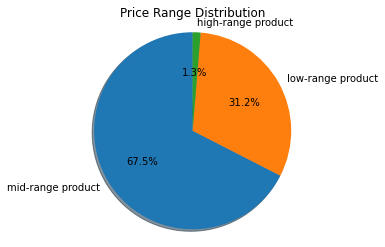

In [67]:
# Create pie chart
my_data = [6268034,2901877,119490]
my_labels = 'mid-range product','low-range product','high-range product'
pie_chart=plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.axis('equal')
plt.title('Price Range Distribution')
plt.autoscale()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_price_range.png'))
plt.show()

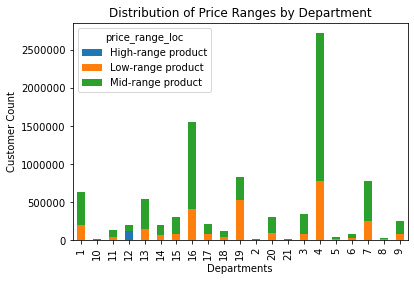

In [68]:
# Distribution of price ranges by department
bar_price_distribution = df_secure_high.groupby(['department_id','price_range_loc']).size().unstack()\
    .plot(kind='bar',stacked=True)
plt.title('Distribution of Price Ranges by Department')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Departments')
plt.ylabel('Customer Count')
bar_price_distribution.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_price_department.png'))

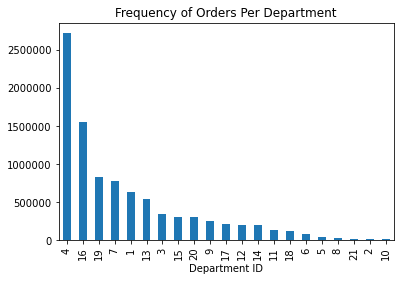

In [69]:
#Frequency of orders by department
bar_department_frequency=df_secure_high['department_id'].value_counts().plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Frequency of Orders Per Department')
plt.xlabel('Department ID')
bar_department_frequency.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_departments_frequency'))

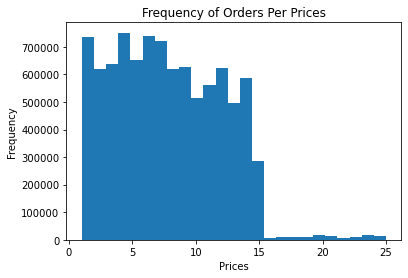

In [70]:
#Frequency of orders per prices
orders_price_frequency=df_secure_high['prices'].plot.hist(bins=25)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Frequency of Orders Per Prices')
plt.xlabel('Prices')
orders_price_frequency.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_price_frequency.png'))

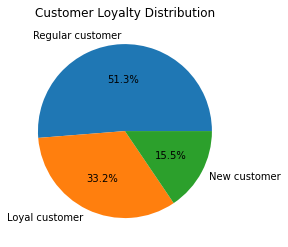

In [71]:
# Pie Chart for customer loyalty
pie_loyalty = df_secure_high['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Customer Loyalty Distribution')
pie_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_loyalty.png'))

In [72]:
# Customer profile loyalty
crosstab_loyalty_profile= pd.crosstab(df_secure_high['profile_loc'],df_secure_high['loyalty_flag'],dropna=False, normalize='index')
crosstab_loyalty_profile

loyalty_flag,Loyal customer,New customer,Regular customer
profile_loc,,,
Older adult with no dependants,0.338089995,0.153425944,0.508484062
Older family,0.332075753,0.155961425,0.511962822
Senior,0.330762600,0.156251597,0.512985804
Young adult with no dependants,0.325463123,0.164020497,0.510516380
Young family,0.329624219,0.153362045,0.517013736


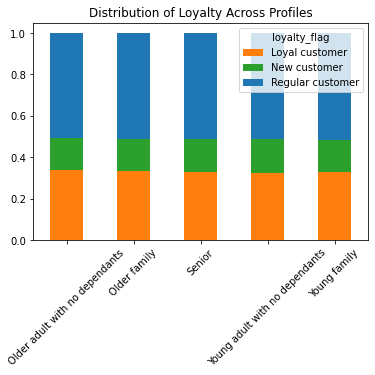

In [73]:
# Stacked bar graph of profile loyalty
bar_loyalty_profile = crosstab_loyalty_profile.plot(kind ='bar', stacked=True, color = ['tab:orange','tab:green','tab:blue'])
plt.xlabel('')
plt.title('Distribution of Loyalty Across Profiles')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation =45)
plt.autolayout :True
bar_loyalty_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_profile3.png'))

/var/folders/73/tyj5z5hd1dldnc7qs0ncc1_c0000gn/T/ipykernel_21074/3890811500.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  scatter_loyalty_total_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_loyaly_total_spend.png'))
/Users/schitchards/opt/anaconda3/envs/career/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


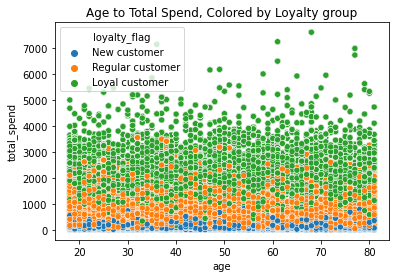

In [74]:
# Ordering habits based on customer loyalty status
scatter_loyalty_total_spend=sns.scatterplot(x='age', y='total_spend', hue='loyalty_flag', data=df_secure_high)
plt.title('Age to Total Spend, Colored by Loyalty group')
scatter_loyalty_total_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_loyaly_total_spend.png'))

In [75]:
# Ordering habits based on gender and loyalty status crosstab
bar_gender_loyalty=pd.crosstab(df_secure_high['loyalty_flag'], df_secure_high['gender'],dropna=False)
bar_gender_loyalty

gender,Female,Male
loyalty_flag,,
Loyal customer,1530708,1555162
New customer,716627,725895
Regular customer,2364643,2396366


<Figure size 432x288 with 0 Axes>

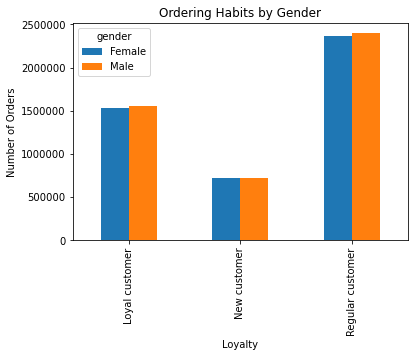

In [76]:
# Ordering habits based on gender and loyalty bar graph
plt.figure()
bar_gender_loyalty=bar_gender_loyalty.plot.bar(title='Ordering Habits by Gender')
plt.xlabel('Loyalty')
plt.ylabel('Number of Orders')
plt.ticklabel_format(style='plain', axis='y')
bar_gender_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_gender_loyalty.png'))

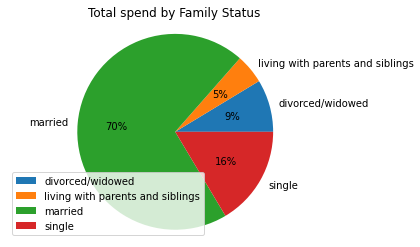

In [77]:
# Create pie chart for family status to total spend
pie_family_spend= df_secure_high.groupby(['family_status']).sum().plot(kind='pie', y='total_spend', autopct='%1.0f%%')
plt.axis('equal')
plt.title('Total spend by Family Status')
plt.ylabel('')
plt.autoscale()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_family_spend.png'))
plt.show()

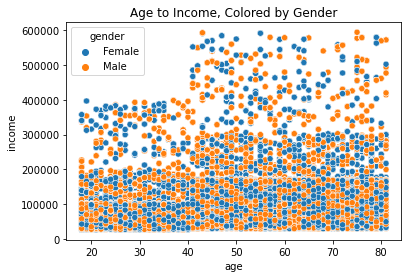

In [82]:
# scatterplot to look for correlation between gender and income
scatter_gender_income=sns.scatterplot(x='age', y='income', hue='gender', data=df_secure_high)
plt.title('Age to Income, Colored by Gender')
scatter_gender_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_gender_income.png'))

In [100]:
#Group data based on profile
profile_mean_spend=df_secure_high.sort_values(['total_spend'],ascending=False).groupby(['profile_loc']).agg({'total_spend':['mean']})
profile_mean_spend.to_clipboard()

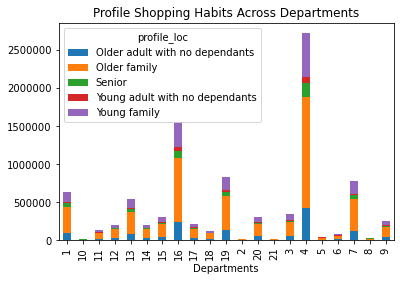

In [80]:
# Distribution of profile shopping habbits by department
bar_profile_price = df_secure_high.groupby(['department_id','profile_loc']).size().unstack()\
    .plot(kind='bar',stacked=True)
plt.title('Profile Shopping Habits Across Departments')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Departments')
bar_profile_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_profile_price.png'))

In [84]:
# Ordering habits based on profile and day of the week crosstab
cross_profile_day=pd.crosstab(df_secure_high['orders_day_of_week'], df_secure_high['profile_loc'],dropna=False)
cross_profile_day

profile_loc,Older adult with no dependants,Older family,Senior,Young adult with no dependants,Young family
orders_day_of_week,,,,,
0,273594,951048,115859,53444,377905
1,252348,869456,104216,51870,345270
2,185741,650813,78230,36485,254331
3,168912,592344,73178,33303,232232
4,166781,586068,70630,34145,230692
5,188277,649936,79134,36914,257724
6,193851,698821,85454,39346,271049


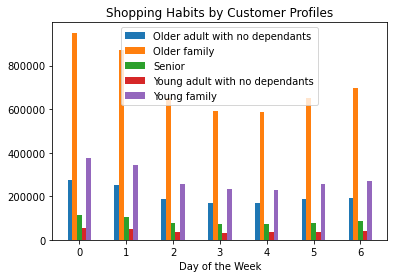

In [90]:
#Frequency of orders by department
barplot=cross_profile_day.plot.bar(rot=0)
plt.title('Shopping Habits by Customer Profiles')
plt.xlabel('Day of the Week')
plt.legend(loc='upper center')
plt.autoscale()
barplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','barplot.png'))